In [10]:
import sys
sys.path.append('./qdarts')

from experiment import Experiment
from plotting import plot_polytopes

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import utilities as u

In [11]:
# tunnel_couplings = np.zeros((N,N))
# tunnel_couplings[0,1] = 50*1e-6
# tunnel_couplings[1,0] = 50*1e-6
# # tunnel_couplings[2,3] = 60*1e-6

# # tunnel_couplings[3,2] = 60*1e-6

In [12]:
N=2
max_value = 10
C_DD = np.random.uniform(0, max_value, size=(N, N))
C_DG = np.random.uniform(0, max_value, size=(N, N))


def generate_capacities_matrices(K):
    mean = 5.5 #aF
    std = 0.15*mean
    C_DD, C_Dg = np.random.normal(mean, std, (K,K)), np.random.normal(2*mean, std, (K,K))
    for i in range(K):
        C_DD[i,i] = np.random.normal(3*mean, std)
    C_DD = (C_DD + C_DD.T)/2
    
    return C_DD, C_Dg

In [13]:
# tunneling_config = {
#         "tunnel_couplings": tunnel_couplings, #tunnel coupling matrix
#         "temperature": 0.1,                   #temperature in Kelvin
#         "energy_range_factor": 5,  #energy scale for the Hamiltonian generation. NOTE: Smaller -> faster but less accurate computation 
# }
# sensor_config = {
#         "sensor_dot_indices": [4,5],  #Indices of the sensor dots
#         "sensor_detunings": [-0.0005,-0.0005],  #Detuning of the sensor dots
#         "noise_amplitude": {"fast_noise": 0.8*1e-6, "slow_noise": 1e-8}, #Noise amplitude for the sensor dots in eV
#         "peak_width_multiplier": 15,  #Width of the sensor peaks in the units of thermal broadening m *kB*T/0.61.
# }

# experiment = Experiment(capacitance_config, tunneling_config, sensor_config)



In [14]:
def generate_CSD_graph(experiment, x_vol, y_vol):
    xks, yks, csd_dataks, polytopesks, _, _ = experiment.generate_CSD(
                                                x_voltages = x_vol,  #V
                                                y_voltages = y_vol,  #V
                                                plane_axes = [[1,0],[0,1]], #NOTE: with defauls use_virtual_gates = False, this means voltages.
                                                compute_polytopes = True,
                                                use_virtual_gates = False)    
        
    # Create a figure
    fig, ax = plt.subplots(figsize=(2.56, 2.56), dpi=100) # 256x256 pixels

    ax.pcolormesh(1e3*xks,1e3*yks,csd_dataks) #plot the background
    plot_polytopes(ax, polytopesks, axes_rescale = 1e3, only_edges=True) #plot the polytopes

    # plot customisation
    # ax.set_xlabel('Relative Voltage $v_0$ (mV)')
    # ax.set_ylabel('Relative Voltage $v_1$ (mV)')
    ax.set_xlim(xks[0]*1e3,xks[-1]*1e3)
    ax.set_ylim(yks[0]*1e3,yks[-1]*1e3)
    
    ax.set_axis_off()
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    

    return fig, ax

: 

In [15]:
C_DD, C_DG = generate_capacities_matrices(2)

C_DD = np.identity(2)
C_DG = np.identity(2)

capacitance_config = {
        "C_DD" : C_DD,  #dot-dot capacitance matrix
        "C_Dg" : C_DG,  #dot-gate capacitance matrix
        "ks" : 0,       #distortion of Coulomb peaks. NOTE: If None -> constant size of Coublomb peak 
}
experiment = Experiment(capacitance_config)

In [ ]:
x_vol = np.linspace(0, 0.1, 500)
y_vol = np.linspace(0, 0.1, 500)

In [ ]:
fig, ax = generate_CSD_graph(experiment, x_vol, y_vol)

In [ ]:
fig.savefig('datasets/test/test2.png')

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# Load the image from the file
image = Image.open("datasets/test2.png")

# Define a transformation to convert it to a PyTorch tensor
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the image if needed
    transforms.ToTensor(),          # Convert the image to a tensor
])

# Apply the transformation
image_tensor = transform(image)

# Add batch dimension (required for CNN input)
# image_tensor = image_tensor.unsqueeze(0)  # Shape: (1, 3, 128, 128)

# print(image_tensor.shape)  # (Batch Size, Channels, Height, Width)

In [ ]:
ax.set_axis_off()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(image_tensor.permute(1, 2, 0))


In [ ]:
u.count_directories_in_folder('datasets/imgs')


In [ ]:
path = './datasets/'
u.count_directories_in_folder(2, path)

In [ ]:
try:
    with h5py.File(path, 'r') as f:
        print("Number of dps in the file:", len(list(f.keys())))
        a_group_key = list(f.keys())[0]
        print(list(f.keys())[0])

except KeyError:
    print("Check the name of the folders under datasets!")
except IOError:
    print("Error opening file...")

In [1]:
import utilities as u
import h5py
path = u.get_path_hfd5(2,24)

with h5py.File(path, 'r') as f:
    print("Number of dps in the file:", len(list(f.keys())))
    a_group_key = list(f.keys())[0]
    print(list(f.keys())[0])
    
    img = f['0023381100.png']


Number of dps in the file: 1000
0023381100.png


In [2]:
import numpy as np
hf_25 = h5py.File(u.get_path_hfd5(2,25), 'r')
hf_1 = h5py.File(u.get_path_hfd5(2,1), 'r')


In [3]:
print(len(hf_25.keys()), len(hf_1.keys()))

50 250


In [4]:
hf_1[list(hf_1.keys())[0]]

<HDF5 group "/0009936918.png" (6 members)>

In [5]:
hf_25[list(hf_25.keys())[0]]['csd'] #x_vol, y_vol, csd

<HDF5 dataset "csd": shape (4, 256, 256), type "|u1">

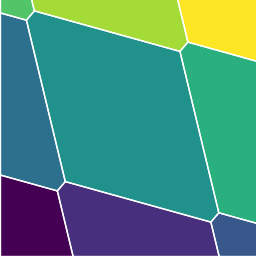

In [8]:
u.reconstruct_img_with_matrices(2,25,'0420761972.png', False)[0]

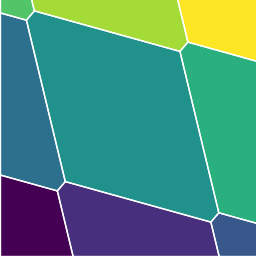

In [9]:
u.load_csd_img(2,25,'0420761972.png')

In [10]:
def count_groups_per_dataset(group):
    group_count = 0
    dataset_count = 0
    for name, item in group.items():
        if isinstance(item, h5py.Group):  # If it's a group, count it and go deeper
            group_count += 1
            sub_group_count, sub_dataset_count = count_groups_per_dataset(item)
            group_count += sub_group_count
            dataset_count += sub_dataset_count
        elif isinstance(item, h5py.Dataset):  # If it's a dataset, count it
            dataset_count += 1
    return group_count, dataset_count

with h5py.File(u.get_path_hfd5(2,25), 'r') as f:
    group_counts = {}
    for name, item in f.items():
        if isinstance(item, h5py.Group):  # If it's a group, process it
            group_count, dataset_count = count_groups_per_dataset(item)
            group_counts[name] = {
                "groups": group_count,
                "datasets": dataset_count
            }

    # Print the result for each top-level group
    for group_name, counts in group_counts.items():
        print(f"Group '{group_name}' contains {counts['groups']} groups and {counts['datasets']} datasets.")


Group '0420761972.png' contains 0 groups and 6 datasets.
Group '0656275368.png' contains 0 groups and 6 datasets.
Group '1055467848.png' contains 0 groups and 6 datasets.
Group '1209812989.png' contains 0 groups and 6 datasets.
Group '1278575405.png' contains 0 groups and 6 datasets.
Group '1305526300.png' contains 0 groups and 6 datasets.
Group '1550733334.png' contains 0 groups and 6 datasets.
Group '1630351278.png' contains 0 groups and 6 datasets.
Group '1673196444.png' contains 0 groups and 6 datasets.
Group '1692173575.png' contains 0 groups and 6 datasets.
Group '2052827801.png' contains 0 groups and 6 datasets.
Group '2307707427.png' contains 0 groups and 6 datasets.
Group '2511668380.png' contains 0 groups and 6 datasets.
Group '3231990847.png' contains 0 groups and 6 datasets.
Group '3731464575.png' contains 0 groups and 6 datasets.
Group '3871659521.png' contains 0 groups and 6 datasets.
Group '4228707339.png' contains 0 groups and 6 datasets.
Group '4373476457.png' contains

(-0.5, 255.5, 255.5, -0.5)

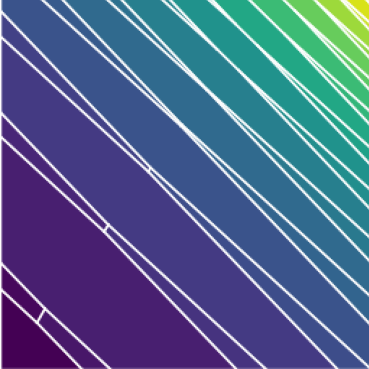

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.transpose(img, (1, 2, 0)))
plt.axis('off')

In [ ]:
# 1420946872, 3433636360, 6227570377
import utilities as u

img, C_DD, C_DG = u.reconstruct_img(2, 15, '1420946872')

./datasets/K-2\batch-15\datapoints.h5\imgs\1420946872.png


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = './datasets/K-2\batch-15\datapoints.h5\imgs\1420946872.png', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)